In [1]:
%matplotlib inline
import cv2
import PIL.ImageGrab
from matplotlib import pyplot as plt
import time as t
from PIL import Image
from pytesseract import image_to_string
import numpy as np

In [131]:
# TIRA O PRINT
t.sleep(3)
im =PIL.ImageGrab.grab()
im.show()

In [235]:
#im=Image.open("print.jpg")

In [236]:
# SEPARA O QUADRADO
im2 = im.crop((709, 467, 1194, 952))
dx=121
dy=121

In [237]:
# SEPARA OS 16 QUADADROS
quadrados=[]
for j in range(1,5):
    for i in range(1,5):
        quadrado=im2.crop((1+(i-1)*dx,1+(j-1)*dy,i*dx,j*dy))
        quadrado=np.array(quadrado)
        quadrados.append(quadrado)

In [238]:
#plt.imshow(quadrados[0])
#print("Vazio")
#print(quadrados[0][10,10])
#print("dois")
#print(quadrados[4][10,10])
#print("quatro")
#print(quadrados[5][10,10])
#print("oito")
#print(quadrados[9][10,10])

In [239]:
# LISTA QUE SALVA O VALOR DE CADA QUADRADO
q=[]
for i in range(len(quadrados)):
    i=1
    q.append(i)

In [240]:
# LÊ POR COR
vazio=[205,192,180]
dois=[238,228,218]
quatro=[237,224,200]
oito=[242,177,121]
for i in range(len(quadrados)):
    if (quadrados[i][10,10]==vazio).all():
        q[i]=0
    elif  (quadrados[i][10,10]==dois).all():
        q[i]=2
    elif (quadrados[i][10,10]==quatro).all():
        q[i]=4
    elif  (quadrados[i][10,10]==oito).all():
        q[i]=8

In [241]:
# PINTA OS QUADRADOS
for a in range(len(quadrados)):
    if q[a]==1:
        quadrado=np.array(quadrados[a])
        fundo=[]
        for i in quadrado[10,10]:
            fundo.append(i)
        for i in range(7,114):
            for j in range(7,114):
                if np.isclose(quadrados[a][i,j][0],fundo[0],rtol=0.1) and np.isclose(quadrados[a][i,j][1],fundo[1],rtol=0.1) and np.isclose(quadrados[a][i,j][2],fundo[2],rtol=0.1):
                    quadrados[a][i,j]=[255,255,255]
                else:
                    quadrados[a][i,j]=[0,0,0]

In [242]:
# LÊ POR PYTESSERACT
for i in range(len(quadrados)):
    if q[i]==1:
        q[i]=int(image_to_string(quadrados[i]))

In [243]:
q

[0, 0, 0, 0, 2, 4, 4, 0, 2, 8, 2, 0, 8, 16, 32, 8]

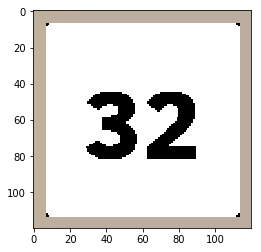

In [225]:
plt.imshow(quadrados[15])

In [168]:
print(quadrados[13][110,110])
print(quadrados[13][10,10])

[246 129  97]
[246 124  95]


In [212]:
im.show()

In [205]:
np.isclose(97,86,atol=10)

False

In [ ]:
# PINTA OS QUADRADOS
for a in range(len(quadrados)):
    if q[a]==1:
        quadrado=np.array(quadrados[a])
        fundo=[]
        for i in quadrado[10,10]:
            fundo.append(i)
        for i in range(7,114):
            for j in range(7,114):
                if (quadrados[a][i,j]==fundo).all():
                    quadrados[a][i,j]=[255,255,255]
                else:
                    quadrados[a][i,j]=[0,0,0]